In [2]:
import pandas as pd
import re
regex_exp = r'"(.*?)"'

In [3]:
df = pd.DataFrame()

In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# URL of the website
url = "https://gaming.uefa.com/en/eurofantasy/create-team"

# Start a WebDriver session (make sure the WebDriver is installed and in PATH)
driver = webdriver.Chrome()

# Navigate to the URL
driver.get(url)

# Wait for the page to load (you may need to adjust the waiting time)
driver.implicitly_wait(10)

tags = ['si-plyr-name', 'si-currency', 'si-pos', 'span.si-home.si-font--bold', 'div.si-thumbnail', 'div.totPts', 'div.gS', 'div.assist', 'div.bR']
column_names = ['playerName', 'playerPrice', 'playerPos', 'playerClub', 'playerImg', 'TotalPoints', 'Goals', 'Assists', 'BallsRecov']

try:
    # Scroll down to trigger the loading of more players (you can adjust the number of scrolls)
    num_scrolls = 30
    for _ in range(num_scrolls):
        driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
        time.sleep(2)  # Adjust the sleep time if needed

    # Find all elements with player info
    player_elements = driver.find_elements(By.CLASS_NAME, tags[0])
    price_elements = driver.find_elements(By.CLASS_NAME, tags[1])
    pos_elements = driver.find_elements(By.CLASS_NAME, tags[2])
    club_elements = driver.find_elements(By.CSS_SELECTOR, tags[3])
    img_elements = driver.find_elements(By.CSS_SELECTOR, tags[4])
    point_elements = driver.find_elements(By.CSS_SELECTOR, tags[5])
    goal_elements = driver.find_elements(By.CSS_SELECTOR, tags[6])
    assist_elements = driver.find_elements(By.CSS_SELECTOR, tags[7])
    ball_elements = driver.find_elements(By.CSS_SELECTOR, tags[8])
    
    print(point_elements)

    # Extract player info
    player = [element.text.strip() for element in player_elements]
    price = [element.text.replace("\n", "").replace("\n", "").replace('€', "").replace("m", "") for element in price_elements][:-1]
    pos = [element.text.strip() for element in pos_elements]
    club = [element.text.strip() for element in club_elements]
    img =  [re.findall(regex_exp, element.get_attribute("innerHTML").strip())[0] for element in img_elements]
    point = [element.text.strip() for element in point_elements]
    goal = [element.text.strip() for element in goal_elements]
    assist = [element.text.strip() for element in assist_elements]
    ball = [element.text.strip() for element in ball_elements]
    
    
finally:
    # Close the WebDriver session
    driver.quit()

[<selenium.webdriver.remote.webelement.WebElement (session="e7b07907475ae656f4912a27895946a7", element="f.AAAA21E3D8794F897164513B9E36CC7E.d.25F6392441642502F1F253402EAA648D.e.4839")>, <selenium.webdriver.remote.webelement.WebElement (session="e7b07907475ae656f4912a27895946a7", element="f.AAAA21E3D8794F897164513B9E36CC7E.d.25F6392441642502F1F253402EAA648D.e.4840")>, <selenium.webdriver.remote.webelement.WebElement (session="e7b07907475ae656f4912a27895946a7", element="f.AAAA21E3D8794F897164513B9E36CC7E.d.25F6392441642502F1F253402EAA648D.e.4841")>, <selenium.webdriver.remote.webelement.WebElement (session="e7b07907475ae656f4912a27895946a7", element="f.AAAA21E3D8794F897164513B9E36CC7E.d.25F6392441642502F1F253402EAA648D.e.4842")>, <selenium.webdriver.remote.webelement.WebElement (session="e7b07907475ae656f4912a27895946a7", element="f.AAAA21E3D8794F897164513B9E36CC7E.d.25F6392441642502F1F253402EAA648D.e.4843")>, <selenium.webdriver.remote.webelement.WebElement (session="e7b07907475ae656f491

In [5]:
df[column_names[0]] = player
df[column_names[1]] = price
df[column_names[2]] = pos
df[column_names[3]] = club
df[column_names[4]] = img
df[column_names[5]] = point[1:]
df[column_names[6]] = goal[1:]
df[column_names[7]] = assist[1:]
df[column_names[8]] = ball[1:]

In [7]:
# df.to_csv("UCLFantasyPlayers.csv", index=False)
df.to_csv("Euro2024Players.csv", index=False)

In [22]:
df2 = pd.read_csv("UCLFantasyPlayers.csv")
df2

,playerName,playerPrice,playerPos,playerClub,playerImg
0,K. Mbappé,11.5,FWD,PAR,https://img.uefa.com/imgml/TP/players/1/2024/7...
1,E. Haaland,11.5,FWD,MCI,https://img.uefa.com/imgml/TP/players/1/2024/7...
2,Vinícius Júnior,11.0,FWD,RMA,https://img.uefa.com/imgml/TP/players/1/2024/7...
3,R. Lewandowski,10.5,FWD,BAR,https://img.uefa.com/imgml/TP/players/1/2024/7...
4,A. Griezmann,10.5,FWD,ATM,https://img.uefa.com/imgml/TP/players/1/2024/7...
...,...,...,...,...,...
959,Z. Popović,4.0,GK,ZVE,https://img.uefa.com/imgml/TP/players/1/2024/7...
960,B. Okoh,4.0,DEF,SAL,https://gaming.uefa.com/en/uclfantasy/static-a...
961,M. Casado,4.0,DEF,BAR,https://img.uefa.com/imgml/TP/players/1/2024/7...
962,Bart Nieuwkoop,4.0,DEF,FEY,https://img.uefa.com/imgml/TP/players/1/2024/7...


# Knockout phase

In [22]:
df2 = pd.read_csv("UCLFantasyPlayers_knockout.csv")
df2

,playerName,playerPrice,playerPos,playerClub,playerImg,TotalPoints,Goals,Assists,BallsRecov
0,E. Haaland,11.7,FWD,MCI,https://img.uefa.com/imgml/TP/players/1/2024/7...,37,5,1,0
1,K. Mbappé,11.5,FWD,PAR,https://img.uefa.com/imgml/TP/players/1/2024/7...,24,3,0,4
2,Vinícius Júnior,11.1,FWD,RMA,https://img.uefa.com/imgml/TP/players/1/2024/7...,23,2,2,2
3,A. Griezmann,10.7,FWD,ATM,https://img.uefa.com/imgml/TP/players/1/2024/7...,36,5,0,8
4,K. De Bruyne,10.5,MID,MCI,https://img.uefa.com/imgml/TP/players/1/2024/7...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
475,Á. Odriozola,3.8,DEF,RSO,https://img.uefa.com/imgml/TP/players/1/2024/7...,9,0,0,5
476,J. Pacheco,3.8,DEF,RSO,https://img.uefa.com/imgml/TP/players/1/2024/7...,3,0,0,3
477,M. Casado,3.8,DEF,BAR,https://img.uefa.com/imgml/TP/players/1/2024/7...,2,0,0,2
478,B. Sarr,3.8,DEF,BAY,https://img.uefa.com/imgml/TP/players/1/2024/7...,1,0,0,2


In [23]:
knockout_clubs = ['ARS', 'ATM', 'BAR', 'BAY', 'CPH', 'DOR', 'INT', 'LAZ',  
                  'MCI', 'NAP', 'PAR', 'POR', 'PSV', 'RBL', 'RMA', 'RSO']

sorted(df2['playerClub'].unique())

['ARS',
 'ATM',
 'BAR',
 'BAY',
 'CPH',
 'DOR',
 'INT',
 'LAZ',
 'MCI',
 'NAP',
 'PAR',
 'POR',
 'PSV',
 'RBL',
 'RMA',
 'RSO']

In [24]:
df3 = df2[df2['playerClub'].isin(knockout_clubs)]
df3

,playerName,playerPrice,playerPos,playerClub,playerImg,TotalPoints,Goals,Assists,BallsRecov
0,E. Haaland,11.7,FWD,MCI,https://img.uefa.com/imgml/TP/players/1/2024/7...,37,5,1,0
1,K. Mbappé,11.5,FWD,PAR,https://img.uefa.com/imgml/TP/players/1/2024/7...,24,3,0,4
2,Vinícius Júnior,11.1,FWD,RMA,https://img.uefa.com/imgml/TP/players/1/2024/7...,23,2,2,2
3,A. Griezmann,10.7,FWD,ATM,https://img.uefa.com/imgml/TP/players/1/2024/7...,36,5,0,8
4,K. De Bruyne,10.5,MID,MCI,https://img.uefa.com/imgml/TP/players/1/2024/7...,0,0,0,0
...,...,...,...,...,...,...,...,...,...
475,Á. Odriozola,3.8,DEF,RSO,https://img.uefa.com/imgml/TP/players/1/2024/7...,9,0,0,5
476,J. Pacheco,3.8,DEF,RSO,https://img.uefa.com/imgml/TP/players/1/2024/7...,3,0,0,3
477,M. Casado,3.8,DEF,BAR,https://img.uefa.com/imgml/TP/players/1/2024/7...,2,0,0,2
478,B. Sarr,3.8,DEF,BAY,https://img.uefa.com/imgml/TP/players/1/2024/7...,1,0,0,2


In [25]:
df3.to_csv("UCLFantasyPlayers_knockout.csv", index=False)

In [26]:
df3 = pd.read_csv("UCLFantasyPlayers_knockout.csv")
df3

,playerName,playerPrice,playerPos,playerClub,playerImg
0,K. Mbappé,11.5,FWD,PAR,https://img.uefa.com/imgml/TP/players/1/2024/7...
1,E. Haaland,11.5,FWD,MCI,https://img.uefa.com/imgml/TP/players/1/2024/7...
2,Vinícius Júnior,11.0,FWD,RMA,https://img.uefa.com/imgml/TP/players/1/2024/7...
3,R. Lewandowski,10.5,FWD,BAR,https://img.uefa.com/imgml/TP/players/1/2024/7...
4,A. Griezmann,10.5,FWD,ATM,https://img.uefa.com/imgml/TP/players/1/2024/7...
...,...,...,...,...,...
473,M. Dams,4.0,DEF,PSV,https://img.uefa.com/imgml/TP/players/1/2024/7...
474,J. Hillson,4.0,GK,ARS,https://img.uefa.com/imgml/TP/players/1/2024/7...
475,L. Sepe,4.0,GK,LAZ,https://img.uefa.com/imgml/TP/players/1/2024/7...
476,D. Khocholava,4.0,DEF,CPH,https://img.uefa.com/imgml/TP/players/1/2024/7...


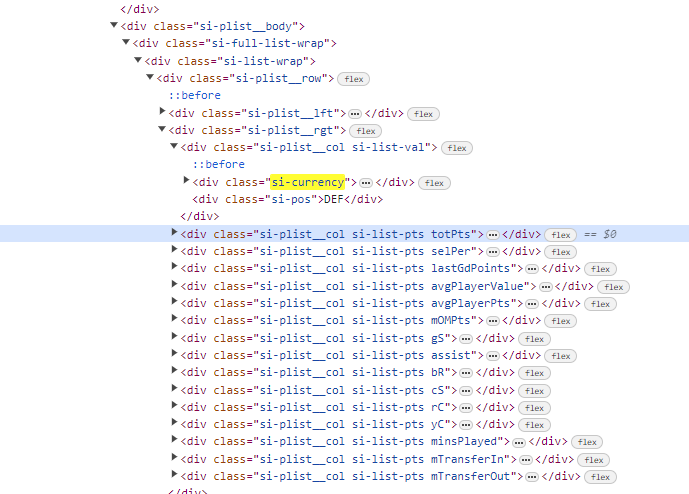
